# Implementation of decision tree
Importing Required Libraries. Let's first load the required libraries.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Load the dataset and show the dataset

In [2]:
#load the dataset
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection
Here,need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [3]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = dataset[feature_cols] # Features
Y = dataset.Outcome # Target variable

# Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [4]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


# Building Decision Tree Model
criterion="entropy" This parameter allows us to use the different-different attribute selection measure.
 “entropy” for the information gain.
max_depth=() ---The maximum depth of the tree...Maximum depth of the tree can be used as a control variable for pre-pruning.

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Evaluating Model
Accuracy can be computed by comparing actual test set values and predicted values.

In [6]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.7705627705627706


# Visualizing Decision Trees
export_graphviz function converts decision tree classifier into dot file 
and pydotplus convert this dot file to png or displayable form on Jupyter.

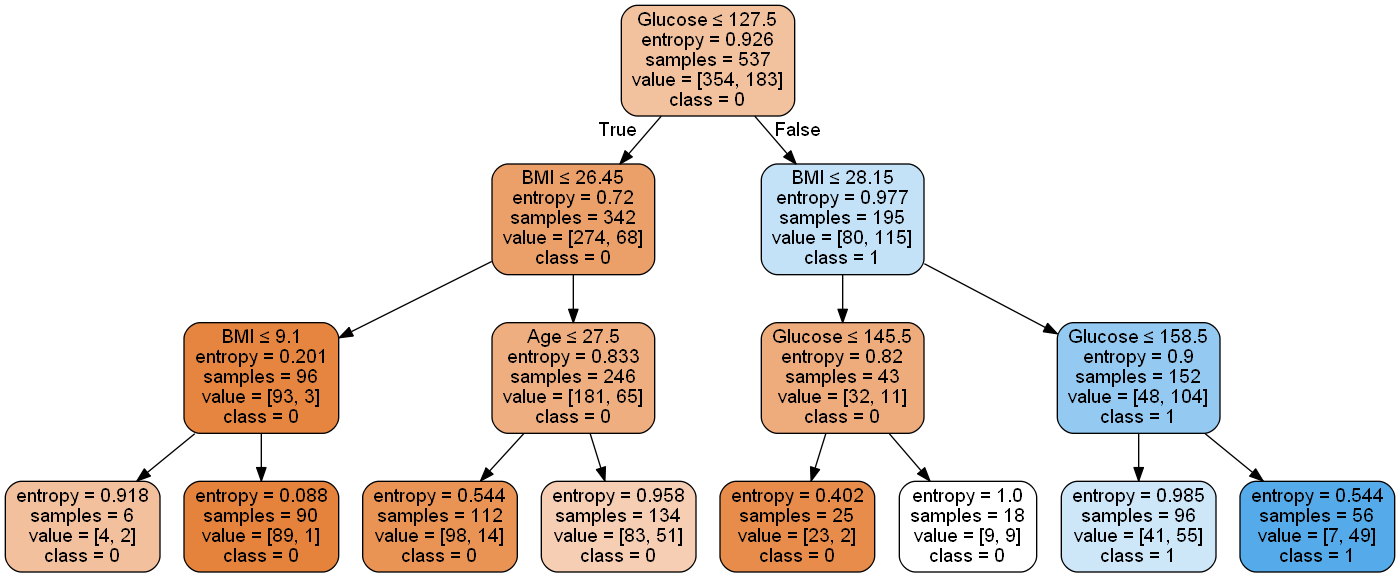

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
